In [24]:
# 필요한 모듈 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [25]:
# 데이터 불러오기
df = pd.read_csv("./data/BankChurners.csv")

In [26]:
# 데이터 칼럼 및 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [27]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [28]:
# 칼럼확인 
df.keys()

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [29]:
columns = df.keys()

In [30]:
for i in range(21):
    print(columns[i])

CLIENTNUM
Attrition_Flag
Customer_Age
Gender
Dependent_count
Education_Level
Marital_Status
Income_Category
Card_Category
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio


**전처리 배분**

CLIENTNUM

##### 타겟 데이터
    Attrition_Flag

#####  안성준
    Customer_Age
    Gender
    Dependent_count

#####  김용호
    Education_Level
    Marital_Status
    Income_Category

#####  문세웅
    Card_Category
    Months_on_book
    Total_Relationship_Count

#####  김희진
    Months_Inactive_12_mon
    Contacts_Count_12_mon
    Credit_Limit

#####  박민지
    Total_Revolving_Bal
    Avg_Open_To_Buy
    Total_Amt_Chng_Q4_Q1

#####  안영훈
    Total_Trans_Amt
    Total_Trans_Ct
    Total_Ct_Chng_Q4_Q1
    Avg_Utilization_Ratio

In [33]:
df.isnull().sum()
# 결측치는 없다는 것을 확인 할 수 있다.

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

/Users/heejinkim/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Customer_Age', ylabel='Density'>

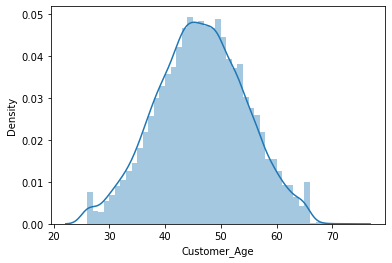

In [39]:
# 나이 칼럼확인하기
sns.distplot(df["Customer_Age"])
# 거의 완벽한 정규분포를 따른다는 것을 알 수 있다.

/Users/heejinkim/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer_Age'>

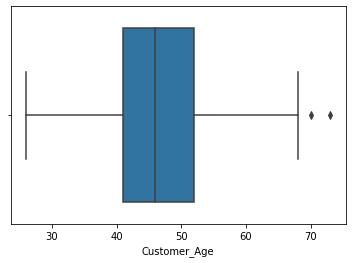

In [42]:
# 이상치 확인
sns.boxplot(df["Customer_Age"])
# 2개의 이상치를 확인할 수 있다.

In [52]:
df["Customer_Age"].np.quantile(0.75)

AttributeError: 'Series' object has no attribute 'np'

In [34]:
df["Gender"].value_counts()
# Female 아니면 Male로 이진분류가 잘 되어있다.
# Label Encoding을 해주면 되겠다.

F    5358
M    4769
Name: Gender, dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df["Gender"])
df["Gender"] = le.transform(df["Gender"])

In [36]:
df["Gender"] # 라벨인코딩 된 것을 확인 할 수 있다.

0        1
1        0
2        1
3        0
4        1
        ..
10122    1
10123    1
10124    0
10125    1
10126    0
Name: Gender, Length: 10127, dtype: int64

In [49]:
df.iloc[:,5:10].head(5)

,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book
0,High School,Married,$60K - $80K,Blue,39
1,Graduate,Single,Less than $40K,Blue,44
2,Graduate,Married,$80K - $120K,Blue,36
3,High School,Unknown,Less than $40K,Blue,34
4,Uneducated,Married,$60K - $80K,Blue,21
